# Survival analysis Nervous system neoplasm

### Load libraries and files

In [2]:
import pandas as pd
import numpy as np
import kaplanmeier as km
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import seaborn as sns

## Analysis

### Read and explore the sample datasets

In [141]:
tumor_samples = pd.read_csv('ns.csv')
print(len(tumor_samples))

2560


In [4]:
gene_cdkn2a = pd.read_csv('cdkn2a_biosample.tsv', sep='\t') # chromosome 9
gene_cdkn2adropna=gene_cdkn2a.dropna(axis=1, how='all')
gene_erbb2 = pd.read_csv('erbb2_biosample.tsv', sep='\t') # chromosome 17
gene_myc = pd.read_csv('myc_biosample.tsv', sep='\t') # chromosome 8
gene_tp53 = pd.read_csv('tp53_biosample.tsv', sep='\t') # chromosome 17

In [5]:
tumor_samples.head(3)

,_id,cohorts.0.id,cohorts.0.label,dataUseConditions.id,dataUseConditions.label,description,histologicalDiagnosis.id,histologicalDiagnosis.label,icdoMorphology.id,icdoMorphology.label,...,provenance.populations.0.type.label,provenance.populations.1.confidence,provenance.populations.1.description,provenance.populations.1.type.id,provenance.populations.1.type.label,info.cellLine,info.samplesource,info.seer,projectId,sex
0,5bab56c2727983b2e00abf78,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,Ependymoma [4th ventricle],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
1,5bab56c3727983b2e00ac462,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,ependymoma [Left cerebral],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
2,5bab56c3727983b2e00ac463,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,ependymoma [fourth ventricle],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F


In [6]:
tumor_samplesdropna=tumor_samples.dropna(axis=1, how='all')
tumor_samplesdropna.head(3)

,_id,cohorts.0.id,cohorts.0.label,dataUseConditions.id,dataUseConditions.label,description,histologicalDiagnosis.id,histologicalDiagnosis.label,icdoMorphology.id,icdoMorphology.label,...,externalReferences.3.label,provenance.populations.0.confidence,provenance.populations.0.description,provenance.populations.0.type.id,provenance.populations.0.type.label,provenance.populations.1.confidence,provenance.populations.1.description,provenance.populations.1.type.id,provenance.populations.1.type.label,sex
0,5bab56c2727983b2e00abf78,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,Ependymoma [4th ventricle],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
1,5bab56c3727983b2e00ac462,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,ependymoma [Left cerebral],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
2,5bab56c3727983b2e00ac463,pgxcohort-2021progenetix,Version at Progenetix Update 2021,DUO:0000004,no restriction,ependymoma [fourth ventricle],NCIT:C3017,Ependymoma,icdom-93913,"Ependymoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F


In [7]:
print(len(list(tumor_samples.columns)))
print(len(list(tumor_samplesdropna.columns)))

104
83


In [8]:
list(tumor_samplesdropna.columns)

['_id',
 'cohorts.0.id',
 'cohorts.0.label',
 'dataUseConditions.id',
 'dataUseConditions.label',
 'description',
 'histologicalDiagnosis.id',
 'histologicalDiagnosis.label',
 'icdoMorphology.id',
 'icdoMorphology.label',
 'icdoTopography.id',
 'icdoTopography.label',
 'id',
 'individualAgeAtCollection',
 'individualId',
 'info.callsetIds.0',
 'info.cnvstatistics.cnvcoverage',
 'info.cnvstatistics.cnvfraction',
 'info.cnvstatistics.delcoverage',
 'info.cnvstatistics.delfraction',
 'info.cnvstatistics.dupcoverage',
 'info.cnvstatistics.dupfraction',
 'info.legacyId.0',
 'pathologicalStage',
 'provenance.geoLocation.geometry.coordinates.0',
 'provenance.geoLocation.geometry.coordinates.1',
 'provenance.geoLocation.geometry.type',
 'provenance.geoLocation.properties.ISO3166alpha3',
 'provenance.geoLocation.properties.city',
 'provenance.geoLocation.properties.country',
 'provenance.geoLocation.properties.label',
 'provenance.geoLocation.properties.latitude',
 'provenance.geoLocation.prope

In [152]:
whole_dataset['individualAgeAtCollection'].value_counts()

KeyError: 'individualAgeAtCollection'

In [9]:
gene_cdkn2a.head(3)

,biosample_id,individual_id,callset_ids,pgx_legacy_sample_id,legacy_ids,description,histological_diagnosis_id,histological_diagnosis_label,icdo_morphology_id,icdo_morphology_label,...,external_references__id___cellosaurus,external_references__label___cellosaurus,external_references__id___arrayexpress,external_references__label___arrayexpress,external_references__id___cbioportal,external_references__label___cbioportal,followup_state__id,followup_state__label,data_use_conditions__id,data_use_conditions__label
0,pgxbs-kftva5zv,pgxind-kftx266l,pgxcs-kftvlijb,NaN,PGX_AM_BS_9788624_GB-har-01,glioblastoma,NCIT:C3058,Glioblastoma,pgx:icdom-94403,"Glioblastoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pgxbs-kftva601,pgxind-kftx266t,pgxcs-kftvlil9,NaN,PGX_AM_BS_9788624_GB-har-05,glioblastoma,NCIT:C3058,Glioblastoma,pgx:icdom-94403,"Glioblastoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pgxbs-kftva603,pgxind-kftx266v,pgxcs-kftvlilq,NaN,PGX_AM_BS_9788624_GB-har-06,glioblastoma,NCIT:C3058,Glioblastoma,pgx:icdom-94403,"Glioblastoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(len(list(gene_cdkn2a.columns)))
print(len(list(gene_cdkn2adropna.columns)))

55
32


In [11]:
list(gene_cdkn2adropna.columns)

['biosample_id',
 'individual_id',
 'callset_ids',
 'pgx_legacy_sample_id',
 'legacy_ids',
 'description',
 'histological_diagnosis_id',
 'histological_diagnosis_label',
 'icdo_morphology_id',
 'icdo_morphology_label',
 'icdo_topography_id',
 'icdo_topography_label',
 'sampled_tissue_id',
 'grade',
 'age_iso',
 'death',
 'followup_state_id',
 'followup_state_label',
 'followup_time',
 'geoprov_city',
 'geoprov_country',
 'geoprov_iso_alpha3',
 'geoprov_lat',
 'geoprov_long',
 'cell_line',
 'experiment_id',
 'series_id',
 'platform_id',
 'external_references__id___geo:GSM',
 'external_references__label___geo:GSM',
 'external_references__id___geo:GSE',
 'external_references__label___geo:GSE']

In [12]:
gene_erbb2.head(3)

,biosample_id,individual_id,callset_ids,pgx_legacy_sample_id,legacy_ids,description,histological_diagnosis_id,histological_diagnosis_label,icdo_morphology_id,icdo_morphology_label,...,external_references__id___cellosaurus,external_references__label___cellosaurus,external_references__id___arrayexpress,external_references__label___arrayexpress,external_references__id___cbioportal,external_references__label___cbioportal,followup_state__id,followup_state__label,data_use_conditions__id,data_use_conditions__label
0,pgxbs-kftvghcu,pgxind-kftx2742,pgxcs-kftvlqyc,NaN,PGX_AM_BS_FamGli-11,oligoastrocytoma [familial],NCIT:C3288,Oligodendroglioma,pgx:icdom-94503,"Oligodendroglioma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pgxbs-kftvghcv,pgxind-kftx2744,pgxcs-kftvlqyt,NaN,PGX_AM_BS_Meningioma-web-01,"Meningioma [WHO grade III, Anaplastic]",NCIT:C4051,Anaplastic (Malignant) Meningioma,pgx:icdom-95303,"Meningioma, malignant",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pgxbs-kftvghcx,pgxind-kftx2746,pgxcs-kftvlqza,NaN,PGX_AM_BS_Meningioma-web-02,"Meningioma [WHO grade III, Anaplastic]",NCIT:C4051,Anaplastic (Malignant) Meningioma,pgx:icdom-95303,"Meningioma, malignant",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
gene_myc.head(3)

,biosample_id,individual_id,callset_ids,pgx_legacy_sample_id,legacy_ids,description,histological_diagnosis_id,histological_diagnosis_label,icdo_morphology_id,icdo_morphology_label,...,external_references__id___cellosaurus,external_references__label___cellosaurus,external_references__id___arrayexpress,external_references__label___arrayexpress,external_references__id___cbioportal,external_references__label___cbioportal,followup_state__id,followup_state__label,data_use_conditions__id,data_use_conditions__label
0,pgxbs-kftva5a1,pgxind-kftx25ek,pgxcs-kftvldtc,NaN,PGX_AM_BS_PGkes2003_MB-kes-02,classic medulloblastoma,NCIT:C3222,Medulloblastoma,pgx:icdom-94703,"Medulloblastoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pgxbs-kftva5ab,pgxind-kftx25ev,pgxcs-kftvldwa,NaN,PGX_AM_BS_PGkes2003_MB-kes-08,classic medulloblastoma,NCIT:C3222,Medulloblastoma,pgx:icdom-94703,"Medulloblastoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pgxbs-kftva5de,pgxind-kftx25io,pgxcs-kftvlet0,NaN,PGX_AM_BS_PitAd-met-2024,"ptituitary adenoma [prolactinoma, primary]",NCIT:C3342,Prolactin-Producing Pituitary Gland Adenoma,pgx:icdom-82710,Prolactinoma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
gene_tp53.head(3)

,biosample_id,individual_id,callset_ids,pgx_legacy_sample_id,legacy_ids,description,histological_diagnosis_id,histological_diagnosis_label,icdo_morphology_id,icdo_morphology_label,...,external_references__id___cellosaurus,external_references__label___cellosaurus,external_references__id___arrayexpress,external_references__label___arrayexpress,external_references__id___cbioportal,external_references__label___cbioportal,followup_state__id,followup_state__label,data_use_conditions__id,data_use_conditions__label
0,pgxbs-kftva5zw,pgxind-kftx266n,pgxcs-kftvlijs,NaN,PGX_AM_BS_9788624_GB-har-02,glioblastoma,NCIT:C3058,Glioblastoma,pgx:icdom-94403,"Glioblastoma, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pgxbs-kftvghdk,pgxind-kftx274y,pgxcs-kftvlr5w,NaN,PGX_AM_BS_Meningioma-web-16,"Meningioma [WHO grade III, Anaplastic]",NCIT:C4051,Anaplastic (Malignant) Meningioma,pgx:icdom-95303,"Meningioma, malignant",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pgxbs-kftvghec,pgxind-kftx275w,pgxcs-kftvlrfx,NaN,PGX_AM_BS_Meningioma-web-33,"Meningioma [WHO grade II, atypical]",NCIT:C4051,Anaplastic (Malignant) Meningioma,pgx:icdom-95303,"Meningioma, malignant",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

### Define survival reference IDs

In [15]:
tumor_ids = list(tumor_samples['individualId'])

### Extract IDs out of Progenetix data

In [16]:
cdkn2a_ids = list(gene_cdkn2a['individual_id'])
erbb2_ids = list(gene_erbb2['individual_id'])
myc_ids = list(gene_myc['individual_id'])
tp53_ids = list(gene_tp53['individual_id'])

###  Define lists and extract matching IDs

In [17]:
cp_cdkn2a = [ID for ID in cdkn2a_ids if ID in tumor_ids]
cp_erbb2 = [ID for ID in erbb2_ids if ID in tumor_ids]
cp_myc = [ID for ID in myc_ids if ID in tumor_ids]
cp_tp53 = [ID for ID in tp53_ids if ID in tumor_ids]

### Define dictionary for temporary storage

In [153]:
tmp_storage = {
        'ids': [],
        'Censoring': [],
        'Time': [],
        'cdkn2a': [],
        'erbb2': [],
        'myc': [],
        'tp53': [],
        'other': [],
        'histologicalDiagnosis': [],
        'histologicalDiagnosisLabel': [],
        'sex': [],
        'CNVfraction': [],
        'CNVcoverage': [],
        'Country':[],
        'Age':[]
        }

In [155]:
for index in range(len(tumor_samples['individualId'])):
    tmp_storage['ids'].append(tumor_samples['individualId'][index])
    tmp_storage['Censoring'].append(tumor_samples['info.death'][index])
    tmp_storage['Time'].append(tumor_samples['info.followupMonths'][index])
    tmp_storage['sex'].append(tumor_samples['sex'][index])
    tmp_storage['histologicalDiagnosis'].append(tumor_samples['histologicalDiagnosis.id'][index])
    tmp_storage['histologicalDiagnosisLabel'].append(tumor_samples['histologicalDiagnosis.label'][index])
    tmp_storage['CNVfraction'].append(tumor_samples['info.cnvstatistics.cnvfraction'][index])
    tmp_storage['CNVcoverage'].append(tumor_samples['info.cnvstatistics.cnvcoverage'][index])
    tmp_storage['Country'].append(tumor_samples['provenance.geoLocation.properties.ISO3166alpha3'][index])
    tmp_storage['Age'].append(tumor_samples['individualAgeAtCollection'][index])

    if tumor_samples['individualId'][index] in cp_cdkn2a:
        tmp_storage['cdkn2a'].append(1)
    else:
        tmp_storage['cdkn2a'].append(0)

    if tumor_samples['individualId'][index] in cp_erbb2:
        tmp_storage['erbb2'].append(1)
    else:
        tmp_storage['erbb2'].append(0)

    if tumor_samples['individualId'][index] in cp_myc:
        tmp_storage['myc'].append(1)
    else:
        tmp_storage['myc'].append(0)

    if tumor_samples['individualId'][index] in cp_tp53:
        tmp_storage['tp53'].append(1)
    else:
        tmp_storage['tp53'].append(0)
        
    if tumor_samples['individualId'][index] not in cp_tp53 and tumor_samples['individualId'][index] not in cp_myc and tumor_samples['individualId'][index] not in cp_erbb2 and tumor_samples['individualId'][index] not in cp_cdkn2a:
        tmp_storage['other'].append(1)
    else:
        tmp_storage['other'].append(0)

In [156]:
final_data = pd.DataFrame.from_dict(tmp_storage)
final_data.to_csv('ns_final.csv', index=False)

In [159]:
final_data['histologicalDiagnosisLabel'].value_counts()

Glioblastoma                                                       706
Neuroblastoma                                                      521
Medulloblastoma                                                    424
Ependymoma                                                         164
Desmoplastic/Nodular Medulloblastoma                                97
Large Cell Medulloblastoma                                          74
Primitive Neuroectodermal Tumor                                     61
Astrocytoma                                                         56
Malignant Glioma                                                    52
Central Nervous System Embryonal Tumor, Not Otherwise Specified     52
Mixed Glioma                                                        48
Retinoblastoma                                                      46
Malignant Peripheral Nerve Sheath Tumor                             46
Oligodendroglioma                                                   35
Atypic

In [170]:
final_data['Age'].value_counts().head(20)

P3Y       51
P11Y      46
P8Y       44
P6Y       43
P5Y       42
P2Y       42
P1Y       38
P13Y      31
P4Y       31
P7Y       30
P14Y      30
P10Y      30
P9Y       30
P1Y10M    26
P12Y      24
P0Y       24
P3Y4M     23
P1Y4M     23
P47Y      22
P52Y      22
Name: Age, dtype: int64

In [117]:
final_data['histologicalDiagnosis'].value_counts()

NCIT:C3058     706
NCIT:C3270     521
NCIT:C3222     424
NCIT:C3017     164
NCIT:C4956      97
NCIT:C6904      74
NCIT:C3716      61
NCIT:C60781     56
NCIT:C5398      52
NCIT:C4822      52
NCIT:C3903      48
NCIT:C3798      46
NCIT:C7541      46
NCIT:C3288      35
NCIT:C53686     32
NCIT:C4049      30
NCIT:C4318      23
NCIT:C3697      18
NCIT:C4715      13
NCIT:C6906      13
NCIT:C3796      12
NCIT:C3789      12
NCIT:C9344      10
NCIT:C3790       7
NCIT:C4322       4
NCIT:C4323       4
Name: histologicalDiagnosis, dtype: int64

In [118]:
final_data_cut = pd.read_csv('ns_final.csv')

In [119]:
cut = ['NCIT:C4323','NCIT:C4322','NCIT:C3790','NCIT:C9344','NCIT:C3796','NCIT:C3789','NCIT:C4715','NCIT:C6906','NCIT:C3697','NCIT:C4318','NCIT:C4049']

In [120]:
final_data_cut = final_data_cut.loc[~final_data_cut['histologicalDiagnosis'].isin(cut)]
final_data_cut.to_csv('ns_final_cut.csv', index=False)

In [121]:
final_data_cut['histologicalDiagnosisLabel'].value_counts()

Glioblastoma                                                       706
Neuroblastoma                                                      521
Medulloblastoma                                                    424
Ependymoma                                                         164
Desmoplastic/Nodular Medulloblastoma                                97
Large Cell Medulloblastoma                                          74
Primitive Neuroectodermal Tumor                                     61
Astrocytoma                                                         56
Malignant Glioma                                                    52
Central Nervous System Embryonal Tumor, Not Otherwise Specified     52
Mixed Glioma                                                        48
Malignant Peripheral Nerve Sheath Tumor                             46
Retinoblastoma                                                      46
Oligodendroglioma                                                   35
Atypic

In [122]:
print(final_data)

                  ids  Censoring  Time  cdkn2a  erbb2  myc  tp53  other  \
0     pgxind-kftx2ejj          0  32.0       1      0    0     0      0   
1     pgxind-kftx2gil          0  24.0       0      0    0     0      1   
2     pgxind-kftx2gin          0  10.0       0      0    0     0      1   
3     pgxind-kftx2gip          0   3.0       0      0    0     0      1   
4     pgxind-kftx2gir          0  19.0       0      0    1     1      0   
...               ...        ...   ...     ...    ...  ...   ...    ...   
2555  pgxind-kftx2btr          1  10.0       0      0    0     0      1   
2556  pgxind-kftx2btt          1  20.0       0      0    0     0      1   
2557  pgxind-kftx3ajf          1   5.0       1      0    0     0      0   
2558  pgxind-kftx3ajh          1  33.0       0      0    0     0      1   
2559  pgxind-kftx3ajj          1  13.0       0      0    0     0      1   

     histologicalDiagnosis histologicalDiagnosisLabel sex  CNVfraction  \
0               NCIT:C301

In [123]:
print(sum(final_data['cdkn2a']))
fcdkn2a=final_data[(final_data.cdkn2a == 1)]
fcdkn2a['histologicalDiagnosisLabel'].value_counts()

476


Glioblastoma                                                       252
Neuroblastoma                                                       86
Medulloblastoma                                                     28
Malignant Peripheral Nerve Sheath Tumor                             24
Mixed Glioma                                                        16
Ependymoma                                                          10
Malignant Glioma                                                     8
Primitive Neuroectodermal Tumor                                      8
Astrocytoma                                                          6
Central Nervous System Embryonal Tumor, Not Otherwise Specified      6
Large Cell Medulloblastoma                                           5
Gliosarcoma                                                          5
Oligodendroglioma                                                    4
Choroid Plexus Carcinoma                                             4
Desmop

In [124]:
print(sum(final_data['tp53']))
ftp53=final_data[(final_data.tp53 == 1)]
ftp53['histologicalDiagnosisLabel'].value_counts()

468


Medulloblastoma                                                    147
Glioblastoma                                                       138
Large Cell Medulloblastoma                                          40
Ependymoma                                                          28
Desmoplastic/Nodular Medulloblastoma                                25
Malignant Peripheral Nerve Sheath Tumor                             19
Neuroblastoma                                                       16
Malignant Glioma                                                    11
Primitive Neuroectodermal Tumor                                     11
Central Nervous System Embryonal Tumor, Not Otherwise Specified     10
Atypical Choroid Plexus Papilloma                                    6
Choroid Plexus Carcinoma                                             4
Mixed Glioma                                                         4
Olfactory Neuroblastoma                                              3
Retino

In [125]:
print(sum(final_data['erbb2']))
ferbb2=final_data[(final_data.erbb2 == 1)]
ferbb2['histologicalDiagnosisLabel'].value_counts()

706


Neuroblastoma                                                      323
Medulloblastoma                                                    193
Large Cell Medulloblastoma                                          41
Glioblastoma                                                        38
Desmoplastic/Nodular Medulloblastoma                                26
Malignant Peripheral Nerve Sheath Tumor                             22
Ependymoma                                                          21
Primitive Neuroectodermal Tumor                                     12
Malignant Glioma                                                     7
Myxopapillary Ependymoma                                             6
Retinoblastoma                                                       4
Ganglioneuroblastoma                                                 3
Oligodendroglioma                                                    2
Olfactory Neuroblastoma                                              1
Glioma

In [126]:
print(sum(final_data['myc']))
fmyc=final_data[(final_data.myc == 1)]
fmyc['histologicalDiagnosisLabel'].value_counts()

277


Glioblastoma                                                       63
Neuroblastoma                                                      48
Medulloblastoma                                                    42
Malignant Peripheral Nerve Sheath Tumor                            28
Ependymoma                                                         27
Large Cell Medulloblastoma                                         19
Atypical Choroid Plexus Papilloma                                   6
Primitive Neuroectodermal Tumor                                     5
Malignant Glioma                                                    5
Myxopapillary Ependymoma                                            5
Mixed Glioma                                                        5
Anaplastic Ependymoma                                               4
Central Nervous System Embryonal Tumor, Not Otherwise Specified     4
Desmoplastic/Nodular Medulloblastoma                                3
Oligodendroglioma   

In [127]:
f0=final_data[(final_data.myc == 0)&(final_data.erbb2 == 0) & (final_data.cdkn2a == 0)&(final_data.tp53 == 0)]
f0['histologicalDiagnosisLabel'].value_counts()

Glioblastoma                                                       311
Neuroblastoma                                                      172
Medulloblastoma                                                    168
Ependymoma                                                          94
Desmoplastic/Nodular Medulloblastoma                                57
Astrocytoma                                                         48
Retinoblastoma                                                      39
Central Nervous System Embryonal Tumor, Not Otherwise Specified     35
Primitive Neuroectodermal Tumor                                     33
Malignant Glioma                                                    29
Mixed Glioma                                                        28
Oligodendroglioma                                                   27
Anaplastic Ependymoma                                               24
Atypical Choroid Plexus Papilloma                                   19
Glioma

In [145]:
sum(f0['histologicalDiagnosisLabel'].value_counts()) # from 2560
len(final_data['histologicalDiagnosisLabel'].unique())

26

In [128]:
final_data['Country'].value_counts()

USA    678
DEU    427
GBR    327
BEL    278
FRA    251
CAN    105
JPN     87
ITA     64
IRL     59
TUR     54
NLD     48
NOR     46
ESP     43
CHN     32
FIN     23
XXX     19
PRT     19
Name: Country, dtype: int64

In [129]:
# gene data
tp_53_group_info = pd.read_csv('tp53_biosample.tsv', sep='\t')
cdkn2a_group_info = pd.read_csv('cdkn2a_biosample.tsv', sep='\t')
myc_group_info = pd.read_csv('myc_biosample.tsv', sep='\t')
erbb2_group_info = pd.read_csv('erbb2_biosample.tsv', sep='\t')
# tumor data
dataset = pd.read_csv('ns.csv')
# match columns 'sample_id' in dataset and columns 'id' in group_info
# filter for rows where 'biosample_id' matches the 'id'
tp53_dataset = pd.merge(dataset, tp_53_group_info, left_on = "id", right_on = 'biosample_id')
tp53_dataset['group'] = 'tp53'
cdkn2a_dataset = pd.merge(dataset, cdkn2a_group_info, left_on = "id", right_on = 'biosample_id')
cdkn2a_dataset['group'] = 'cdkn2a'
myc_dataset = pd.merge(dataset, myc_group_info, left_on = "id", right_on = 'biosample_id')
myc_dataset['group'] = 'myc'
erbb2_dataset = pd.merge(dataset, erbb2_group_info, left_on = "id", right_on = 'biosample_id')
erbb2_dataset['group'] = 'erbb2'

whole_dataset = pd.concat([tp53_dataset, cdkn2a_dataset, myc_dataset, erbb2_dataset])
whole_dataset = whole_dataset[['info.followupMonths', 'info.death', 'group', 'histologicalDiagnosis.id', 'info.cnvstatistics.cnvfraction', 'sex', 'histologicalDiagnosis.label']]
whole_dataset = whole_dataset.dropna()
whole_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216 entries, 0 to 698
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   info.followupMonths             1216 non-null   float64
 1   info.death                      1216 non-null   int64  
 2   group                           1216 non-null   object 
 3   histologicalDiagnosis.id        1216 non-null   object 
 4   info.cnvstatistics.cnvfraction  1216 non-null   float64
 5   sex                             1216 non-null   object 
 6   histologicalDiagnosis.label     1216 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 76.0+ KB


---

## Plots

### Kaplan-Meier Plots

Compute Survival based on gene

In [134]:
time = whole_dataset['info.followupMonths']  
event = whole_dataset['info.death']
group = whole_dataset['group']
results = km.fit(time, event, group)
km.plot(results, ylab='x')
plt.show()

TypeError: plot() got an unexpected keyword argument 'ylab'

Compute Survival based on sex

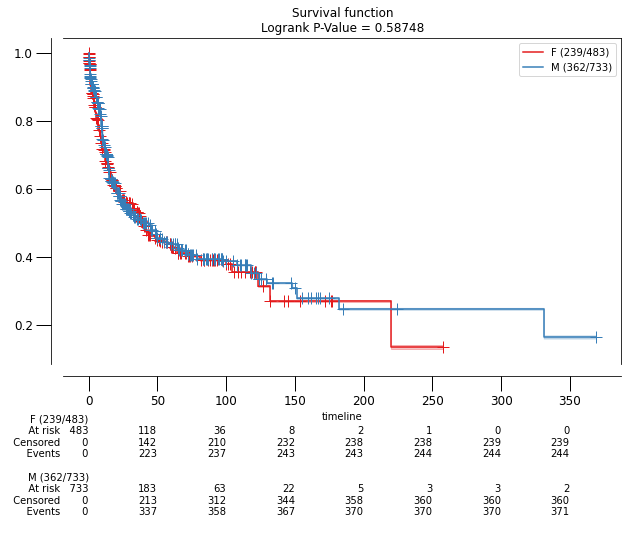

In [103]:
time = whole_dataset['info.followupMonths']  
event = whole_dataset['info.death']
sex = whole_dataset['sex']
results_2 = km.fit(time, event, sex)
km.plot(results_2)
plt.show()

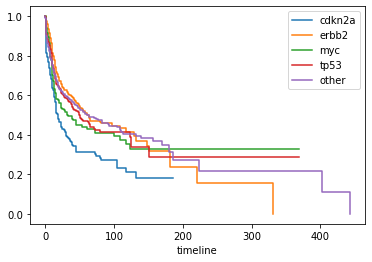

In [104]:
dataset = pd.read_csv('ns_final.csv')
genes = ['cdkn2a', 'erbb2', 'myc', 'tp53', 'other']
dataset = dataset.dropna()
i=0
while i < len(genes):
    group = dataset.groupby(genes[i]).get_group(1)
    kmf = KaplanMeierFitter()
    durations = group['Time']
    event_observed = group['Censoring']
    kmf.fit(durations, event_observed, label=genes[i])
    kmf.plot(ci_show=False)
    i=i+1

plt.show()

In [131]:
whole_dataset.head(10)

,info.followupMonths,info.death,group,histologicalDiagnosis.id,info.cnvstatistics.cnvfraction,sex,histologicalDiagnosis.label
0,19.0,0,tp53,NCIT:C3017,0.667,F,Ependymoma
1,18.0,0,tp53,NCIT:C3017,0.541,F,Ependymoma
2,11.0,0,tp53,NCIT:C3017,0.565,M,Ependymoma
3,7.0,0,tp53,NCIT:C3017,0.381,M,Ependymoma
4,72.0,0,tp53,NCIT:C3017,0.315,F,Ependymoma
5,56.0,0,tp53,NCIT:C3017,0.254,M,Ependymoma
6,59.0,0,tp53,NCIT:C3017,0.594,F,Ependymoma
7,50.0,0,tp53,NCIT:C3017,0.598,M,Ependymoma
8,88.0,0,tp53,NCIT:C3017,0.213,F,Ependymoma
9,56.0,0,tp53,NCIT:C3017,0.190,M,Ependymoma


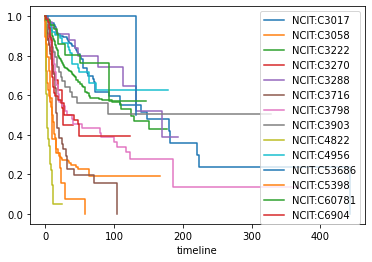

In [105]:
dataset = pd.read_csv('ns_final_cut.csv')
dataset = dataset.dropna()
NCIT = dataset['histologicalDiagnosis'].unique()
i=0
while i < len(NCIT):
    group = dataset.groupby('histologicalDiagnosis').get_group(NCIT[i])
    kmf = KaplanMeierFitter()
    durations = group['Time']
    event_observed = group['Censoring']
    kmf.fit(durations, event_observed, label=NCIT[i])
    kmf.plot(ci_show=False)
    i=i+1

plt.savefig('survival_tumortype.png')

### CNV distribution in different tumor types (violinplot) / Duplication/deletion of gene per tumor type

Frequencies of CNVs for each gene of interest

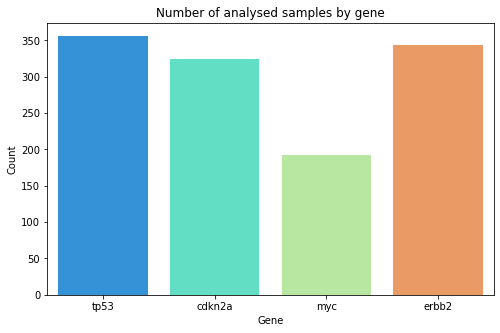

In [132]:
plt.figure(figsize=(8,5))
sns.countplot(x='group', data=whole_dataset, palette='rainbow')
plt.title('Number of analysed samples by gene')
plt.xlabel('Gene')
plt.ylabel('Count')
plt.show()

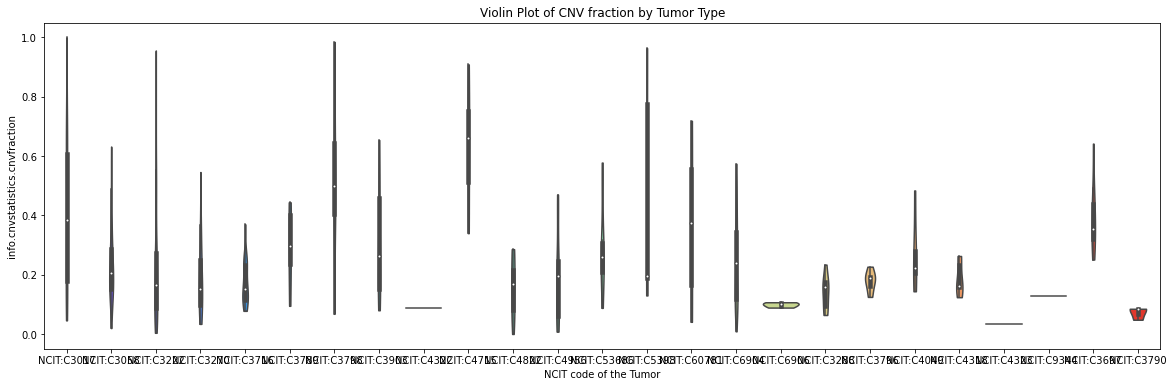

In [100]:
plt.figure(figsize=(20,6))
sns.violinplot(x='histologicalDiagnosis.id',y='info.cnvstatistics.cnvfraction', data=whole_dataset, palette='rainbow', cut=0)
plt.title('Violin Plot of CNV fraction by Tumor Type')
plt.xlabel('NCIT code of the Tumor')
plt.show()

Most common Tumor samples in this data:
* NCIT:C3058  Glioblastoma 706
* NCIT:C3270  Neuroblastoma 521
* NCIT:C3222  Medulloblastoma 424
* NCIT:C3017  Ependymoma 164
* NCIT:C4956  Desmoplastic/Nodular Medulloblastoma 97
* NCIT:C6904  Large Cell Medulloblastoma 74
* NCIT:C3716  Primitive Neuroectodermal Tumor 61
* NCIT:C60781 Astrocytoma 56

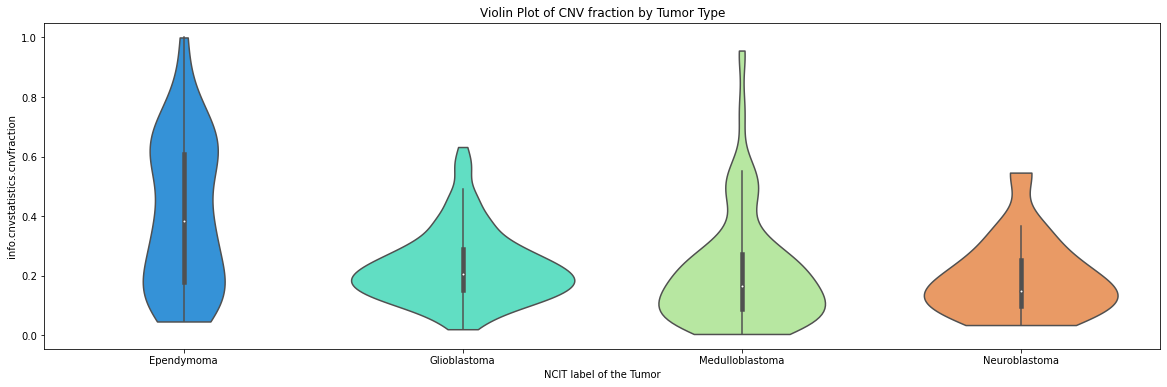

In [99]:
ncit_codes = ['NCIT:C3058', 'NCIT:C3270', 'NCIT:C3222', 'NCIT:C3017']
filtered_data = whole_dataset[whole_dataset['histologicalDiagnosis.id'].isin(ncit_codes)]
plt.figure(figsize=(20,6))
sns.violinplot(x='histologicalDiagnosis.label',y='info.cnvstatistics.cnvfraction',data=filtered_data, palette='rainbow', cut=0)
plt.title('Violin Plot of CNV fraction by Tumor Type')
plt.xlabel('NCIT label of the Tumor')
plt.show()

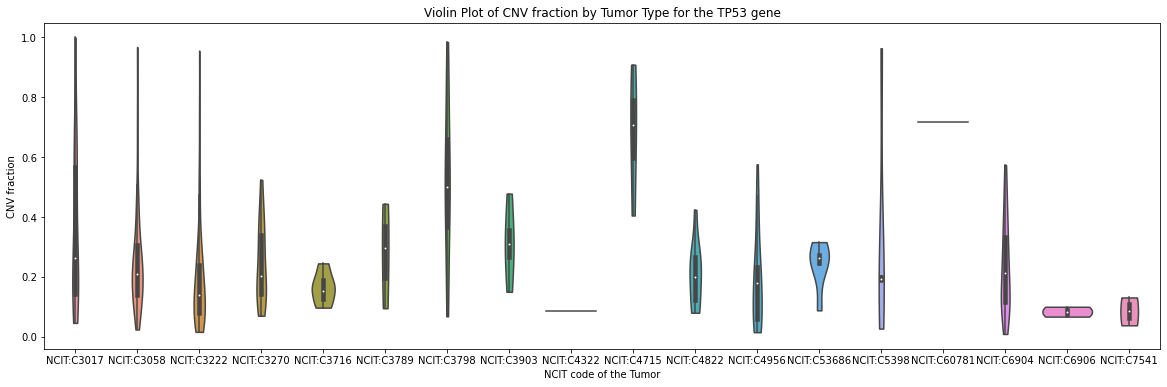

In [101]:
plt.figure(figsize=(20,6))
sns.violinplot(x='histologicalDiagnosis.id',y='info.cnvstatistics.cnvfraction',data=tp53_dataset,cut=0)
plt.title('Violin Plot of CNV fraction by Tumor Type for the TP53 gene')
plt.xlabel('NCIT code of the Tumor')
plt.ylabel('CNV fraction') # what fraction of the TP53 gene has CNV (statistics for all samples of a specific malignancy)
plt.show()

Text(0, 0.5, 'CNV fraction')

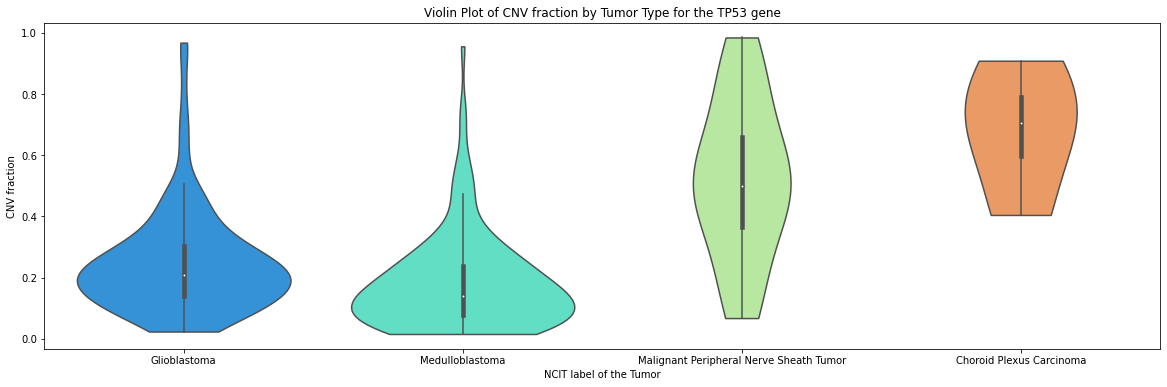

In [148]:
ncit_codes = ['NCIT:C3058', 'NCIT:C3222','NCIT:C3798', 'NCIT:C4715']
filtered_data = tp53_dataset[tp53_dataset['histologicalDiagnosis.id'].isin(ncit_codes)]
plt.figure(figsize=(20,6))
sns.violinplot(x='histologicalDiagnosis.label',y="info.cnvstatistics.cnvfraction",data=filtered_data, palette='rainbow', cut=0)
plt.title('Violin Plot of CNV fraction by Tumor Type for the TP53 gene')
plt.xlabel('NCIT label of the Tumor')
plt.ylabel('CNV fraction') # what fraction of the TP53 gene has CNV 

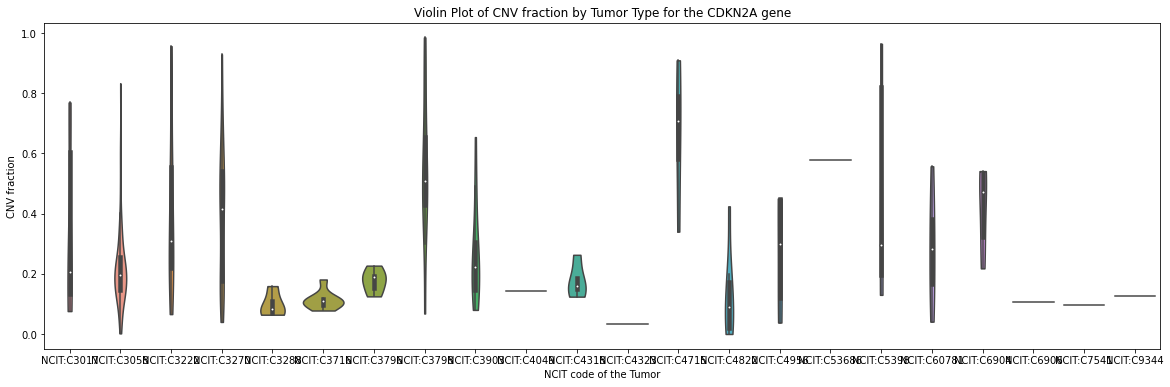

In [103]:
plt.figure(figsize=(20,6))
sns.violinplot(x='histologicalDiagnosis.id',y='info.cnvstatistics.cnvfraction',data=cdkn2a_dataset, cut=0)
plt.title('Violin Plot of CNV fraction by Tumor Type for the CDKN2A gene')
plt.xlabel('NCIT code of the Tumor')
plt.ylabel('CNV fraction')
plt.show()

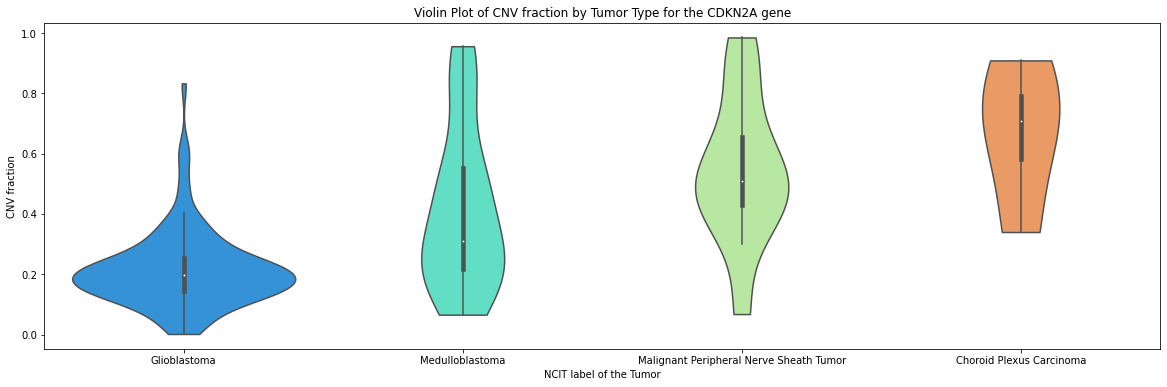

In [147]:
ncit_codes = ['NCIT:C3058', 'NCIT:C3222','NCIT:C3798', 'NCIT:C4715']
filtered_data = cdkn2a_dataset[cdkn2a_dataset['histologicalDiagnosis.id'].isin(ncit_codes)]
plt.figure(figsize=(20,6))
sns.violinplot(x='histologicalDiagnosis.label',y="info.cnvstatistics.cnvfraction",data=filtered_data, palette='rainbow', cut=0)
plt.title('Violin Plot of CNV fraction by Tumor Type for the CDKN2A gene')
plt.xlabel('NCIT label of the Tumor')
plt.ylabel('CNV fraction') # what fraction of the CDKN2A gene has CNV 
plt.show()

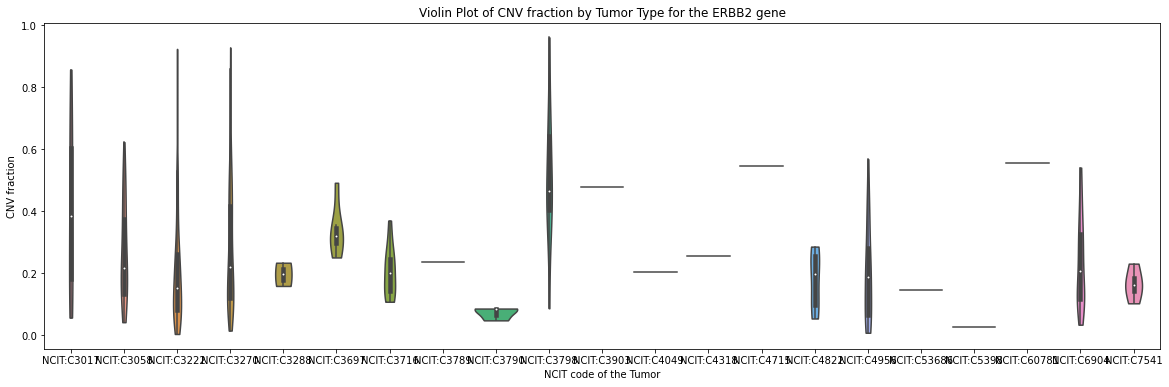

In [112]:
plt.figure(figsize=(20,6))
sns.violinplot(x='histologicalDiagnosis.id',y='info.cnvstatistics.cnvfraction',data=erbb2_dataset, cut=0)
plt.title('Violin Plot of CNV fraction by Tumor Type for the ERBB2 gene')
plt.xlabel('NCIT code of the Tumor')
plt.ylabel('CNV fraction')
plt.show()

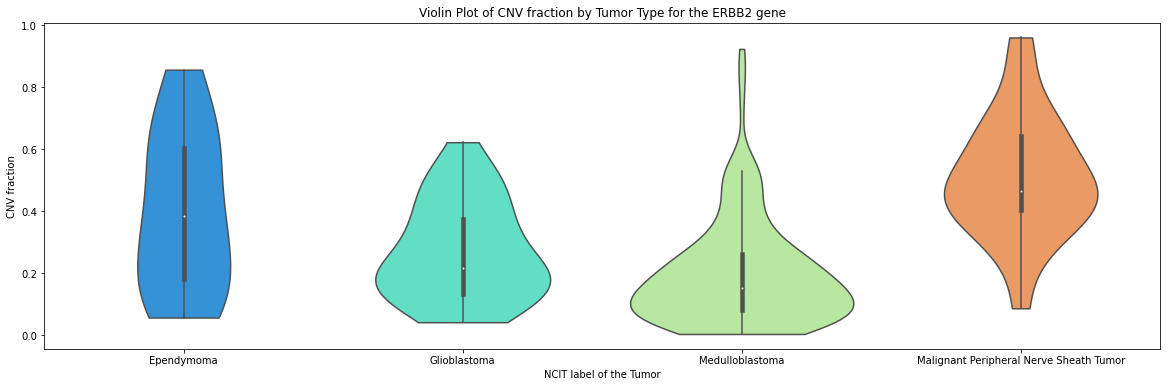

In [135]:
ncit_codes = ['NCIT:C3058', 'NCIT:C3222','NCIT:C3798', 'NCIT:C3017']
filtered_data = erbb2_dataset[erbb2_dataset['histologicalDiagnosis.id'].isin(ncit_codes)]
plt.figure(figsize=(20,6))
sns.violinplot(x='histologicalDiagnosis.label',y="info.cnvstatistics.cnvfraction",data=filtered_data, palette='rainbow', cut=0)
plt.title('Violin Plot of CNV fraction by Tumor Type for the ERBB2 gene')
plt.xlabel('NCIT label of the Tumor')
plt.ylabel('CNV fraction') # what fraction of the ERBB2 gene has CNV (statistics for all samples of a specific malignancy)
plt.show()

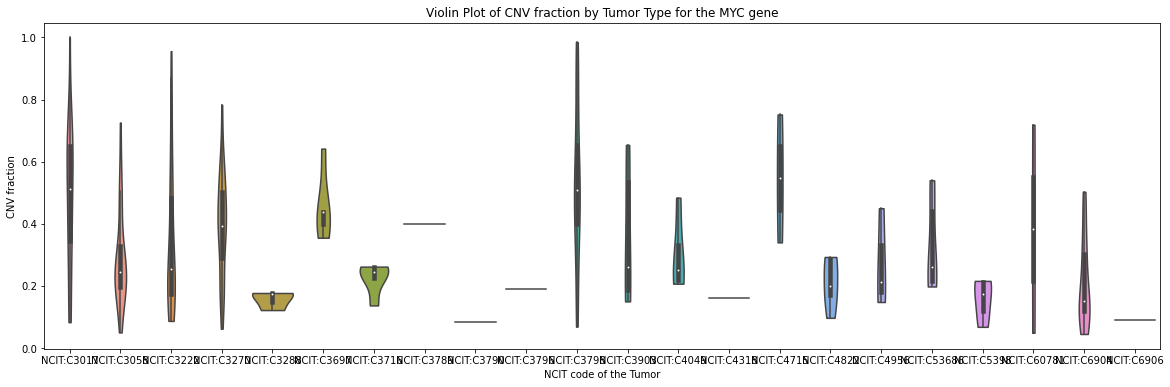

In [113]:
plt.figure(figsize=(20,6))
sns.violinplot(x='histologicalDiagnosis.id',y='info.cnvstatistics.cnvfraction',data=myc_dataset, cut=0)
plt.title('Violin Plot of CNV fraction by Tumor Type for the MYC gene')
plt.xlabel('NCIT code of the Tumor')
plt.ylabel('CNV fraction')
plt.show()

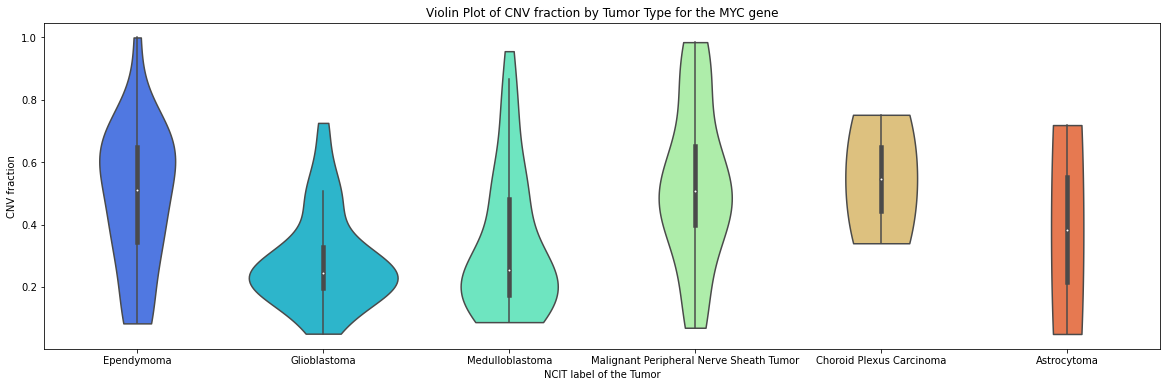

In [133]:
ncit_codes = ['NCIT:C3058', 'NCIT:C3222','NCIT:C3798', 'NCIT:C3017', 'NCIT:C36904', 'NCIT:C4715', 'NCIT:C60781']
filtered_data = myc_dataset[myc_dataset['histologicalDiagnosis.id'].isin(ncit_codes)]
plt.figure(figsize=(20,6))
sns.violinplot(x='histologicalDiagnosis.label',y="info.cnvstatistics.cnvfraction",data=filtered_data, palette='rainbow', cut=0)
plt.title('Violin Plot of CNV fraction by Tumor Type for the MYC gene')
plt.xlabel('NCIT label of the Tumor')
plt.ylabel('CNV fraction') # what fraction of the MYC gene has CNV 
plt.show()

### Boxplot

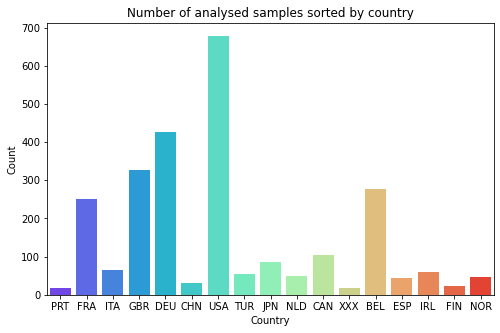

In [82]:
plt.figure(figsize=(8,5))
sns.countplot(x='Country', data=final_data, palette='rainbow')
plt.title('Number of analysed samples sorted by country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()